In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
df = pd.read_csv('winequality-red.csv')

### Exploaring the data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

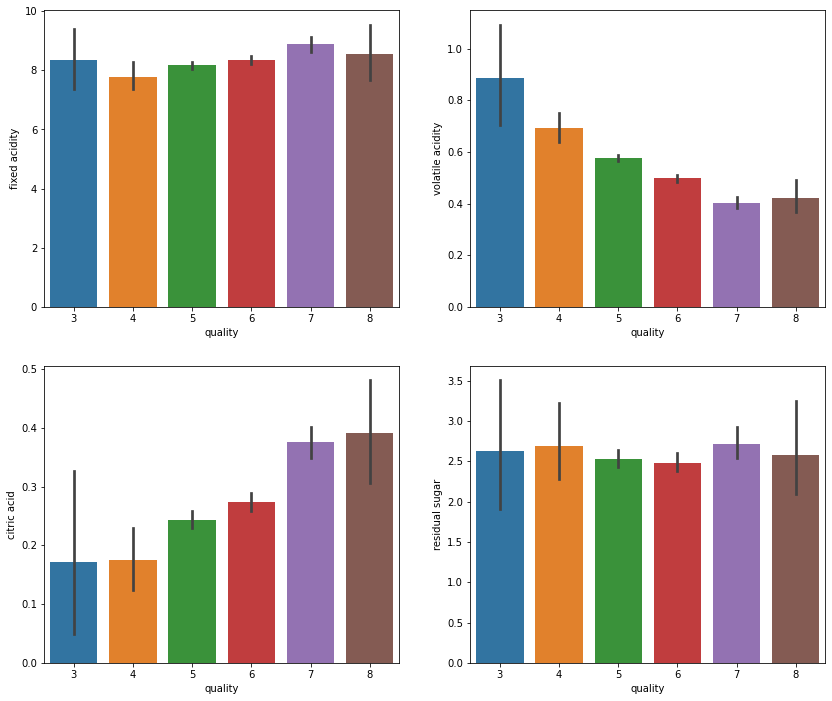

In [19]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.barplot(x='quality', y='fixed acidity', data=df)

plt.subplot(2,2,2)
sns.barplot(x='quality', y='volatile acidity', data=df)

plt.subplot(2,2,3)
sns.barplot(x='quality', y='citric acid', data=df)

plt.subplot(2,2,4)
sns.barplot(x='quality', y='residual sugar', data=df)

plt.show()

- fixed acidity does not give any specification to classify the quality.
- It's a big downside at volatile acidity as we rise in quality
- Composition of citric acid go higher as we go higher in the quality of the wine
- residual Sugar does not give any specification to classify the quality.

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

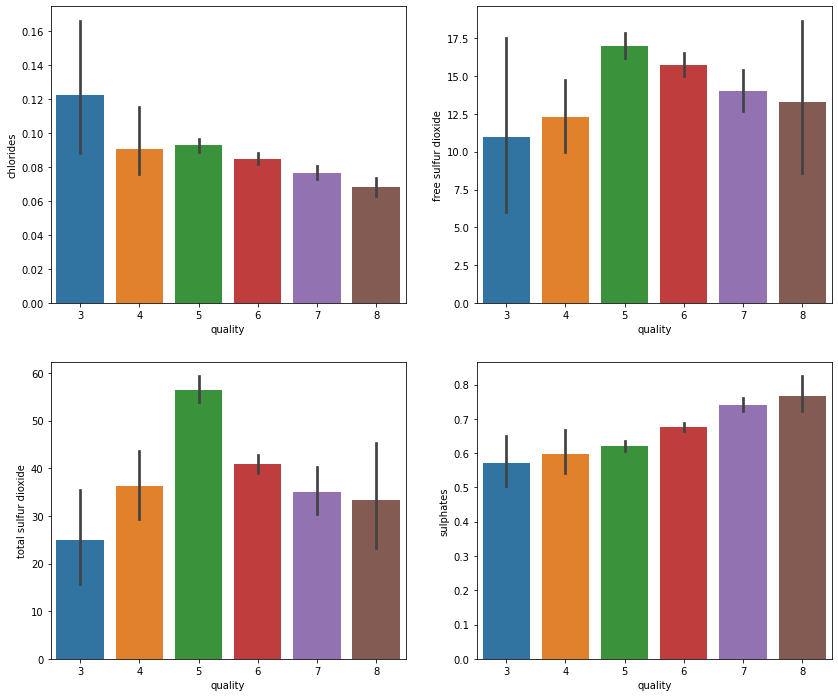

In [21]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.barplot(x='quality', y='chlorides', data=df)

plt.subplot(2,2,2)
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

plt.subplot(2,2,3)
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

plt.subplot(2,2,4)
sns.barplot(x='quality', y='sulphates', data=df)

plt.show()

- Composition of chloride also go down as we go higher in the quality of the wine.
- free sulpher dixoide does not give any specification to classify the quality.
- total sulpher dixoide does not give any specification to classify the quality.
- Sulphates level goes higher with the quality of wine

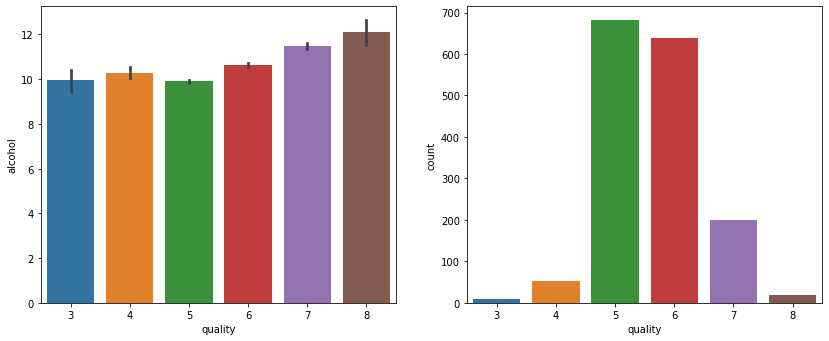

In [45]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.barplot(x='quality', y='alcohol', data=df)

plt.subplot(2,2,2)
sns.countplot(x='quality', data=df);

- Alcohol level also goes higher as the quality of wine increases
- 5,6 quality wines are the most popular

In [47]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [48]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


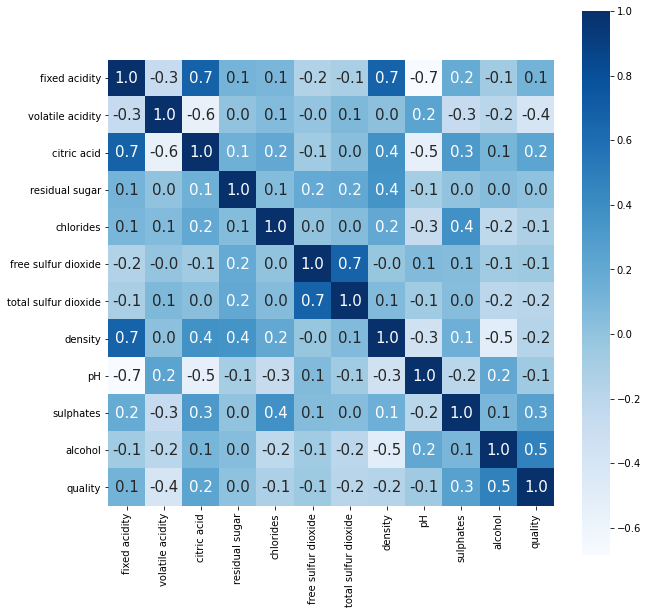

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':15}, cmap = 'Blues');

- fixed acidity is highly positivily correlated with (citric acid, density) and highly negativaly correlated with pH
- free sulfur dixoid is highly positivily correlated with total sulfur dioxide
- quality is 50% positivily correlated with alcohol

change quality as following:<br>
3,4,5,6 -> bad quality(0)<br>
7,8 -> good quality (1)

In [54]:
df.quality=df.quality.apply(lambda x: 0 if x<7 else 1)
df.quality.unique()

array([0, 1], dtype=int64)

In [55]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

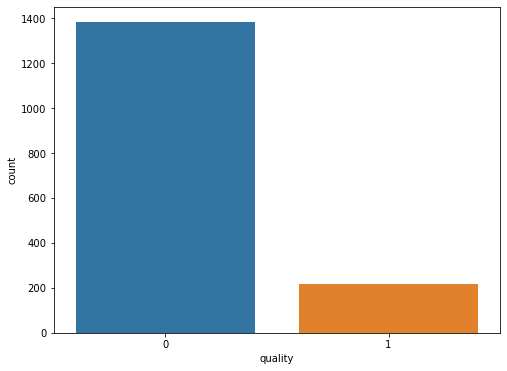

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=df);

In [62]:
df.quality.dtypes

dtype('int64')

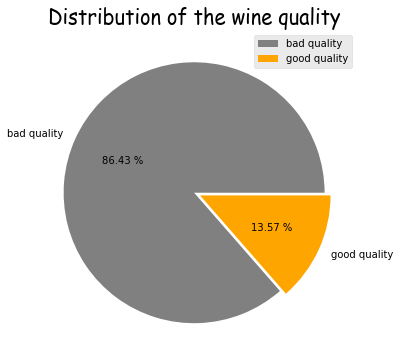

In [86]:
# plot pie chart to see the precentage between good and bad quality
plt.figure(figsize=(8,6))
plt.title("Distribution of the wine quality", fontdict={'fontname' : 'Comic Sans Ms', 'fontsize' : 20})
labels = ['bad quality', 'good quality']
bad_quality = df.quality[df.quality==0].count()
good_quality = df.quality[df.quality==1].count()
qualities = [bad_quality, good_quality]
explode=[0,0.05]

plt.pie(qualities, labels=labels, autopct='%.2f %%', explode=explode, colors=['grey', 'orange'])
plt.legend()
plt.show()

### Assign Feature and target variables

In [88]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [89]:
y = df.quality

### Scalling the Features

Scale the features will lead to Rounding the ranges between feature columns which leads the model to preform well

In [90]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Spliting the data into training and testing data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=50)

In [118]:
len(X_train)

1199

In [119]:
len(X_test)

400

### Bulding and Training the model

In [129]:
model = RandomForestClassifier(n_estimators=90)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9475

### Save the model

In [132]:
joblib.dump(model, "Red Wine Quality Prediction")

['Red Wine Quality Prediction']